In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

(240, 320, 3)


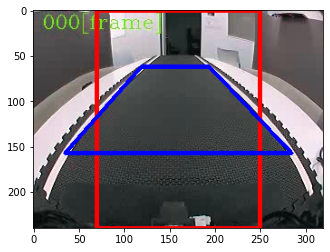

In [4]:
img = cv2.imread("data/20220604_test/test_img_000.jpg")

# for the view
cv2.rectangle(img, (70, 0), (250, 240), (255, 0, 0), thickness=4)

# for line detection
points = np.array([[119, 62], [194, 62], [285, 157], [35, 157]], np.int32)
points = points.reshape((-1, 1, 2))
cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=4)


plt.imshow(img)
print(img.shape)

In [5]:
# conversion
src_points = np.float32([
                  (119, 62), 
                  (194,62), 
                  (285,157),
                  (35,157)
                ])

'''NOTE : INCREASE 425 TO GET MORE VIEW ON SIDES LIKE PAVEMENT (MAKES SELECTED WINDOW NARROW)'''

dst_points = np.float32([                 
                  (70, 0),
                  (250, 0),
                  (250, 240),
                  (70, 240)
                        ])

def warp(img, src, dst):
    """
    conversion matrix
    """
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    
    # inverse
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size)
    
    return warped, M, Minv

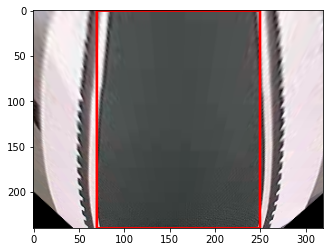

In [6]:
img = cv2.imread("data/20220604_test/test_img_000.jpg")

warp_img,  M, Minv = warp(img, src_points, dst_points)

draw_poly2 = cv2.polylines(warp_img, [dst_points.astype(int)], True, (255, 0, 0), 2)

plt.imshow(draw_poly2)

True

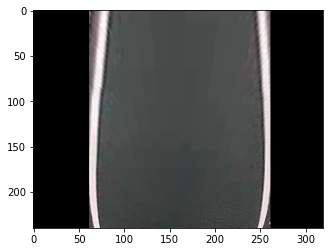

In [7]:
# test image
img = cv2.imread("data/20220604_test/test_img_000.jpg")

warp_img,  M, Minv = warp(img, src_points, dst_points)
warp_img[0:240, 0:62, :] = [0, 0, 0]
warp_img[0:240, 262:320, :] = [0, 0, 0]

plt.imshow(warp_img)
cv2.imwrite("test_img.jpg", warp_img )

In [1]:
y = + (1987.87)x^0 + (-38.3736)x^1 + (0.162471)x^2

SyntaxError: invalid syntax (4277237155.py, line 1)

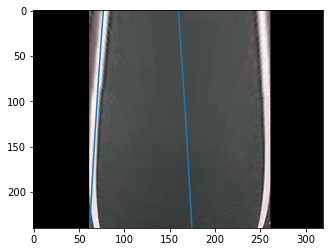

In [10]:
x = np.linspace(0, 320, 321)  # 区間[0,2π]を100等分する101点
y = 1987.87 + (-38.3736) * x + (0.162471) * x * x
plt.plot(x, y)
plt.imshow(warp_img)

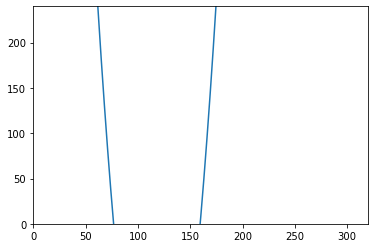

In [12]:
plt.ylim(0, 240)
plt.xlim(0, 320)
plt.plot(x, y)